In [4]:
import geoai

In [5]:
image_path = './pabbi_satellite_image.tif'

===== RASTER INFORMATION: ./pabbi_satellite_image.tif =====
Driver: GTiff
Dimensions: 31447 x 23080 pixels
Number of bands: 3
Data type: int16
Coordinate Reference System: EPSG:4326
Georeferenced Bounds: BoundingBox(left=71.731650084257, bottom=33.986464888201006, right=71.81599751067999, top=34.048370271921)
Pixel Resolution: 2.6822089999998085e-06, 2.682208999999812e-06
NoData Value: 256.0

----- Band Statistics -----
Band 1:
  Min: 0.00
  Max: 255.00
  Mean: 88.90
  Std Dev: 49.29
Band 2:
  Min: 0.00
  Max: 255.00
  Mean: 87.86
  Std Dev: 40.79
Band 3:
  Min: 0.00
  Max: 255.00
  Mean: 80.85
  Std Dev: 40.16


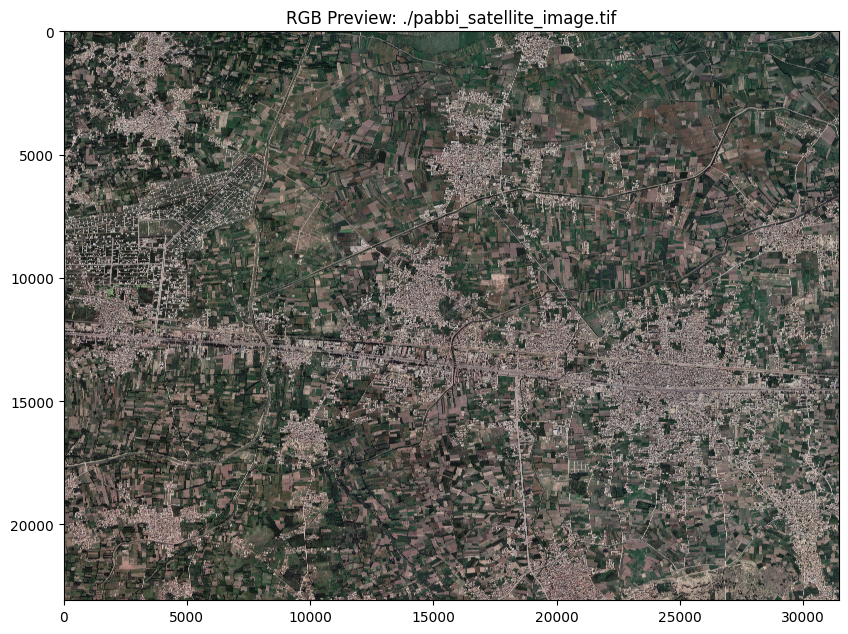

In [3]:
geoai.print_raster_info(image_path)

# Viewing the satellite image as raster
import leafmap
m = leafmap.Map(center=[34.0174, 71.7749], zoom=14)   # center on your scene
m.add_basemap("SATELLITE")

# Tip: keep the file on an SSD; very large rasters still take a few-second hit
m.add_raster(
    "pabbi_satellte_image_COG.tif",      # local COG path
    indexes=[1, 2, 3],                   # R, G, B band order
    layer_name="Pabbi COG (local read)",
    #rescale = "0,200",
)

m.add_layer_manager()
m


#pip install "titiler.application[rgdal]" uvicorn
#uvicorn titiler.application.main:app --host 0.0.0.0 --port 8000
# keep this terminal running


In [ ]:

import leafmap, pathlib


cog_path = pathlib.Path("pabbi_satellte_image_COG.tif").resolve()
file_url = f"file://{cog_path}" # local file url


m = leafmap.Map(center=[34.0174, 71.7749], zoom=14)
m.add_basemap("SATELLITE")

m.add_cog_layer(
    url=file_url,
    titiler_endpoint="http://127.0.0.1:8000",  # <— your local Titiler
    name="Pabbi COG (tiled)",
    bands=[1,2,3],       # Titiler will still rescale for you
   # rescale=["10,190","0,200","0,200"],  # rescale each band
    
    #opacity=0.7,
)
# Then add your GeoJSON boundary on top of both sides
geojson_url = "https://raw.githubusercontent.com/code4geoai/gee/main/pabb_crop_V3.geojson"
m.add_geojson(
    geojson_url,
    layer_name="Boundary",
    style={"color": "green", "weight": 0.5, "fillOpacity": 0.1,},
    visible=False,
    zoom_to_layer=True,
)

m.add_layer_manager()
m


Map(center=[34.0174, 71.7749], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', 'zo…

In [73]:
m = leafmap.Map(center=[34.0174, 71.7749], zoom=14)
m.add_basemap("SATELLITE")
# Checking with streaming 
hayat_titiler = 'http://imhayatkhan-hayat-titiler.hf.space'
file_url = 'https://pabbiimagery.s3.eu-north-1.amazonaws.com/pabbi_satellte_image_COG.tif'

# Add your COG layer using public Titiler endpoint
m.add_cog_layer(
    url=file_url,
    titiler_endpoint=hayat_titiler,  # 
    name="Pabbi COG (tiled)",
    bands=[1,2,3],       # Titiler will still rescale for you
   # rescale=["10,190","0,200","0,200"],  # rescale each band
    
    #opacity=0.7,
)

m.add_layer_manager()
m


Map(center=[34.0174, 71.7749], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', 'zo…

my titiler service on hugging face
https://huggingface.co/spaces/imhayatkhan/hayat_titiler

In [7]:
bbox = m.user_roi_bounds()
print(f'Bounding box: {bbox}')

Bounding box: [71.8066, 34.0254, 71.8099, 34.0266]
